## **PROYECTO DE MACHINE LEARNING**
- #### **Sebastián Carrero Cardona**



# **Objetivo**
Identificar el modelo de clasificación de machine learning más eficiente de tres que se implementaran a la base de datos pública "bank_marketing"

# **Contexto**

<p style="text-align:justify"> Utilizaremos este conjunto de datos para probar el rendimiento de un modelo de clasificación y explorar las mejores estrategias para mejorar la próxima campaña de marketing directo de una institución bancaria.</p>

<p style="text-align:justify"> Los depósitos a plazo son inversiones en efectivo que se mantienen en una entidad financiera y constituyen una importante fuente de ingresos para los bancos, por lo que son importantes para las entidades financieras a la hora de comercializarlos. El telemarketing sigue siendo una técnica de marketing muy popular debido a la eficacia potencial del contacto de persona a persona que proporciona una llamada telefónica, que a veces es todo lo contrario de muchos mensajes de marketing impersonales y robóticos transmitidos a través de los medios sociales y digitales. Sin embargo, la ejecución de este esfuerzo de marketing directo suele requerir una gran inversión por parte de la empresa, ya que es necesario contratar grandes centros de llamadas para contactar directamente con los clientes.</p>

¿Cómo puede la entidad bancaria realizar campañas de marketing directo más eficaces en el futuro? Analice este conjunto de datos e identifique los patrones que nos ayudarán a desarrollar estrategias futuras.

# **Importación de librerías**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.pandas.set_option('display.max_columns', None)
from ydata_profiling import ProfileReport
from sklearn.feature_selection import SelectFromModel
import seaborn as sns # Visualización de alto nivel
from sklearn.preprocessing import OneHotEncoder
from pycaret.classification import *
from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"

# **Carga de dataframe**

In [2]:
data = pd.read_csv('../data/raw/bank_marketing.csv', sep=';')
data

class   age          job  marital          education default  housing  \
0       no  30.0  blue-collar  married           basic.9y      no      yes   
1       no  39.0     services   single        high.school      no       no   
2       no  25.0     services  married        high.school      no      yes   
3       no  38.0     services  married           basic.9y      no  unknown   
4       no  47.0       admin.  married  university.degree      no      yes   
...    ...   ...          ...      ...                ...     ...      ...   
4114    no  30.0       admin.  married           basic.6y      no      yes   
4115    no  39.0       admin.  married        high.school      no      yes   
4116    no  27.0      student   single        high.school      no       no   
4117    no  58.0       admin.  married        high.school      no       no   
4118    no  34.0   management   single        high.school      no      yes   

         loan    contact month day_of_week  duration  campaign  pdays  \
0          no   cellular   may         fri     487.0       2.0    NaN   
1          no  telephone   may         fri     346.0       4.0    NaN   
2          no  telephone   jun         wed     227.0       1.0    NaN   
3     unknown  telephone   jun         fri      17.0       3.0    NaN   
4          no   cellular   nov         mon      58.0       1.0    NaN   
...       ...        ...   ...         ...       ...       ...    ...   
4114      yes   cellular   jul         thu      53.0       1.0    NaN   
4115       no  telephone   jul         fri     219.0       1.0    NaN   
4116       no   cellular   may         mon      64.0       2.0    NaN   
4117       no   cellular   aug         fri     528.0       1.0    NaN   
4118       no   cellular   nov         wed     175.0       1.0    NaN   

      previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0          0.0  nonexistent          -1.8          92.893          -46.2   
1          0.0  nonexistent           1.1          93.994          -36.4   
2          0.0  nonexistent           1.4          94.465          -41.8   
3          0.0  nonexistent           1.4          94.465          -41.8   
4          0.0  nonexistent          -0.1          93.200          -42.0   
...        ...          ...           ...             ...            ...   
4114       0.0  nonexistent           1.4          93.918          -42.7   
4115       0.0  nonexistent           1.4          93.918          -42.7   
4116       1.0      failure          -1.8          92.893          -46.2   
4117       0.0  nonexistent           1.4          93.444          -36.1   
4118       0.0  nonexistent          -0.1          93.200          -42.0   

      euribor3m  nr.employed  
0         1.313       5099.1  
1         4.855       5191.0  
2         4.962       5228.1  
3         4.959       5228.1  
4         4.191       5195.8  
...         ...          ...  
4114      4.958       5228.1  
4115      4.959       5228.1  
4116      1.354       5099.1  
4117      4.966       5228.1  
4118      4.120       5195.8  

[4119 rows x 21 columns]

In [3]:
data.shape

(4119, 21)

# **Descripcion General del Dataset**
- numero de filas y columnas
- tipos de datos y si estan correctos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           4119 non-null   object 
 1   age             4119 non-null   float64
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   contact         4119 non-null   object 
 9   month           4119 non-null   object 
 10  day_of_week     4119 non-null   object 
 11  duration        4119 non-null   float64
 12  campaign        4119 non-null   float64
 13  pdays           160 non-null    float64
 14  previous        4119 non-null   float64
 15  poutcome        4119 non-null   object 
 16  emp.var.rate    4119 non-null   float64
 17  cons.price.idx  4119 non-null   f

### Additional Information

#### Input variables:
   ##### bank client data:<br>
   - 1. age (numeric)
   - 2. job : tipo de trabajo (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
   - 3.  marital : estado civil (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
   - 4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
   - 5. default: tiene crédito en mora? (categorical: 'no','yes','unknown')
   - 6. housing: tiene préstamo para vivienda? (categorical: 'no','yes','unknown')
   - 7. loan: tiene prestamo personal? (categorical: 'no','yes','unknown')
   ##### related with the last contact of the current campaign:
   - 8. contact: tipo de contacto (categorical: 'cellular','telephone') 
   - 9. month: ultimo contacto del mes (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  - 10. day_of_week: ultimo ía de contacto de la semana (categorical: 'mon','tue','wed','thu','fri')
  - 11.  <p style="text-align:justify"> duration: duración último contactoen segundos (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</p>
   ##### other attributes:
  - 12. campaign: número de contactos realizados durante esta campaña y para este cliente (numeric, includes last contact)
  - 13. pdays: número de días transcurridos desde la última vez que se contactó con el cliente en una campaña anterior (numeric; 999 means client was not previously contacted)
  - 14. previous: número de contactos realizados antes de esta campaña y para este cliente (numeric)
  - 15. poutcome: resultado de la campaña de marketing anterior (categorical: 'failure','nonexistent','success')
   ##### social and economic context attributes
  - 16. emp.var.rate: tasa de variación del empleo - quarterly indicator (numeric)
  - 17. cons.price.idx: indice de precio al consumidor - monthly indicator (numeric)     
  - 18. cons.conf.idx: índice de confianza del consumidor - monthly indicator (numeric)     
  - 19. euribor3m: tasa de interes promedio a 3 meses - daily indicator (numeric)
  - 20. nr.employed: número de empleados - quarterly indicator (numeric)

  ##### Output variable (desired target):
  - 21.  y - ¿el cliente ha suscrito un depósito a plazo? (binary: 'yes','no')

In [5]:
data["class"].value_counts() #Vericamos el blanceo de la variable objetivo

no     3668
yes     451
Name: class, dtype: int64

# **Limpieza de calidad de datos general**

### Datos duplicados exactos

In [6]:
data.duplicated().sum()

0

Se verifica que no hay datos duplicados exactos.

### Datos nulos

In [7]:
data.isnull().sum()#datos nulos de cada variable

class                0
age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             3959
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [8]:
data = data.drop('pdays', axis=1)
data

class   age          job  marital          education default  housing  \
0       no  30.0  blue-collar  married           basic.9y      no      yes   
1       no  39.0     services   single        high.school      no       no   
2       no  25.0     services  married        high.school      no      yes   
3       no  38.0     services  married           basic.9y      no  unknown   
4       no  47.0       admin.  married  university.degree      no      yes   
...    ...   ...          ...      ...                ...     ...      ...   
4114    no  30.0       admin.  married           basic.6y      no      yes   
4115    no  39.0       admin.  married        high.school      no      yes   
4116    no  27.0      student   single        high.school      no       no   
4117    no  58.0       admin.  married        high.school      no       no   
4118    no  34.0   management   single        high.school      no      yes   

         loan    contact month day_of_week  duration  campaign  previous  \
0          no   cellular   may         fri     487.0       2.0       0.0   
1          no  telephone   may         fri     346.0       4.0       0.0   
2          no  telephone   jun         wed     227.0       1.0       0.0   
3     unknown  telephone   jun         fri      17.0       3.0       0.0   
4          no   cellular   nov         mon      58.0       1.0       0.0   
...       ...        ...   ...         ...       ...       ...       ...   
4114      yes   cellular   jul         thu      53.0       1.0       0.0   
4115       no  telephone   jul         fri     219.0       1.0       0.0   
4116       no   cellular   may         mon      64.0       2.0       1.0   
4117       no   cellular   aug         fri     528.0       1.0       0.0   
4118       no   cellular   nov         wed     175.0       1.0       0.0   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent          -1.8          92.893          -46.2      1.313   
1     nonexistent           1.1          93.994          -36.4      4.855   
2     nonexistent           1.4          94.465          -41.8      4.962   
3     nonexistent           1.4          94.465          -41.8      4.959   
4     nonexistent          -0.1          93.200          -42.0      4.191   
...           ...           ...             ...            ...        ...   
4114  nonexistent           1.4          93.918          -42.7      4.958   
4115  nonexistent           1.4          93.918          -42.7      4.959   
4116      failure          -1.8          92.893          -46.2      1.354   
4117  nonexistent           1.4          93.444          -36.1      4.966   
4118  nonexistent          -0.1          93.200          -42.0      4.120   

      nr.employed  
0          5099.1  
1          5191.0  
2          5228.1  
3          5228.1  
4          5195.8  
...           ...  
4114       5228.1  
4115       5228.1  
4116       5099.1  
4117       5228.1  
4118       5195.8  

[4119 rows x 20 columns]

In [9]:
data.isnull().sum()

class             0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

### Cambio de tipos de datos

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           4119 non-null   object 
 1   age             4119 non-null   float64
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   contact         4119 non-null   object 
 9   month           4119 non-null   object 
 10  day_of_week     4119 non-null   object 
 11  duration        4119 non-null   float64
 12  campaign        4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [11]:
data

class   age          job  marital          education default  housing  \
0       no  30.0  blue-collar  married           basic.9y      no      yes   
1       no  39.0     services   single        high.school      no       no   
2       no  25.0     services  married        high.school      no      yes   
3       no  38.0     services  married           basic.9y      no  unknown   
4       no  47.0       admin.  married  university.degree      no      yes   
...    ...   ...          ...      ...                ...     ...      ...   
4114    no  30.0       admin.  married           basic.6y      no      yes   
4115    no  39.0       admin.  married        high.school      no      yes   
4116    no  27.0      student   single        high.school      no       no   
4117    no  58.0       admin.  married        high.school      no       no   
4118    no  34.0   management   single        high.school      no      yes   

         loan    contact month day_of_week  duration  campaign  previous  \
0          no   cellular   may         fri     487.0       2.0       0.0   
1          no  telephone   may         fri     346.0       4.0       0.0   
2          no  telephone   jun         wed     227.0       1.0       0.0   
3     unknown  telephone   jun         fri      17.0       3.0       0.0   
4          no   cellular   nov         mon      58.0       1.0       0.0   
...       ...        ...   ...         ...       ...       ...       ...   
4114      yes   cellular   jul         thu      53.0       1.0       0.0   
4115       no  telephone   jul         fri     219.0       1.0       0.0   
4116       no   cellular   may         mon      64.0       2.0       1.0   
4117       no   cellular   aug         fri     528.0       1.0       0.0   
4118       no   cellular   nov         wed     175.0       1.0       0.0   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent          -1.8          92.893          -46.2      1.313   
1     nonexistent           1.1          93.994          -36.4      4.855   
2     nonexistent           1.4          94.465          -41.8      4.962   
3     nonexistent           1.4          94.465          -41.8      4.959   
4     nonexistent          -0.1          93.200          -42.0      4.191   
...           ...           ...             ...            ...        ...   
4114  nonexistent           1.4          93.918          -42.7      4.958   
4115  nonexistent           1.4          93.918          -42.7      4.959   
4116      failure          -1.8          92.893          -46.2      1.354   
4117  nonexistent           1.4          93.444          -36.1      4.966   
4118  nonexistent          -0.1          93.200          -42.0      4.120   

      nr.employed  
0          5099.1  
1          5191.0  
2          5228.1  
3          5228.1  
4          5195.8  
...           ...  
4114       5228.1  
4115       5228.1  
4116       5099.1  
4117       5228.1  
4118       5195.8  

[4119 rows x 20 columns]

In [12]:
data[['age', 'duration', 'campaign', 'previous', 'nr.employed']] = data[['age', 'duration', 'campaign', 'previous', 'nr.employed']].astype('int64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           4119 non-null   object 
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   contact         4119 non-null   object 
 9   month           4119 non-null   object 
 10  day_of_week     4119 non-null   object 
 11  duration        4119 non-null   int64  
 12  campaign        4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [14]:
for col in data:
    print(f"{col} = {data[col].unique()}")

class = ['no' 'yes']
age = [30 39 25 38 47 32 41 31 35 36 29 27 44 46 45 50 55 40 28 34 33 51 48 20
 76 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70]
job = ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital = ['married' 'single' 'divorced' 'unknown']
education = ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default = ['no' 'unknown' 'yes']
housing = ['yes' 'no' 'unknown']
loan = ['no' 'unknown' 'yes']
contact = ['cellular' 'telephone']
month = ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week = ['fri' 'wed' 'mon' 'thu' 'tue']
duration = [ 487  346  227   17   58  128  290   44   68  170  301  148   97  211
  553  698  191   59   38  849  326  222  626  119  388  479  446  127
  109  113  393  151  256   42  5

# **Analisis exploratorio de datos**

In [15]:
profile = ProfileReport(data, title="Bank Marketing Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
data = data.drop('previous', axis=1)
data

class  age          job  marital          education default  housing  \
0       no   30  blue-collar  married           basic.9y      no      yes   
1       no   39     services   single        high.school      no       no   
2       no   25     services  married        high.school      no      yes   
3       no   38     services  married           basic.9y      no  unknown   
4       no   47       admin.  married  university.degree      no      yes   
...    ...  ...          ...      ...                ...     ...      ...   
4114    no   30       admin.  married           basic.6y      no      yes   
4115    no   39       admin.  married        high.school      no      yes   
4116    no   27      student   single        high.school      no       no   
4117    no   58       admin.  married        high.school      no       no   
4118    no   34   management   single        high.school      no      yes   

         loan    contact month day_of_week  duration  campaign     poutcome  \
0          no   cellular   may         fri       487         2  nonexistent   
1          no  telephone   may         fri       346         4  nonexistent   
2          no  telephone   jun         wed       227         1  nonexistent   
3     unknown  telephone   jun         fri        17         3  nonexistent   
4          no   cellular   nov         mon        58         1  nonexistent   
...       ...        ...   ...         ...       ...       ...          ...   
4114      yes   cellular   jul         thu        53         1  nonexistent   
4115       no  telephone   jul         fri       219         1  nonexistent   
4116       no   cellular   may         mon        64         2      failure   
4117       no   cellular   aug         fri       528         1  nonexistent   
4118       no   cellular   nov         wed       175         1  nonexistent   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0             -1.8          92.893          -46.2      1.313         5099  
1              1.1          93.994          -36.4      4.855         5191  
2              1.4          94.465          -41.8      4.962         5228  
3              1.4          94.465          -41.8      4.959         5228  
4             -0.1          93.200          -42.0      4.191         5195  
...            ...             ...            ...        ...          ...  
4114           1.4          93.918          -42.7      4.958         5228  
4115           1.4          93.918          -42.7      4.959         5228  
4116          -1.8          92.893          -46.2      1.354         5099  
4117           1.4          93.444          -36.1      4.966         5228  
4118          -0.1          93.200          -42.0      4.120         5195  

[4119 rows x 19 columns]

### Conversión de categorico a númerico

In [17]:
#Conversión de la varibale objetivo
data['class'] = data['class'].map({'yes': 1, 'no': 0})
data

class  age          job  marital          education default  housing  \
0         0   30  blue-collar  married           basic.9y      no      yes   
1         0   39     services   single        high.school      no       no   
2         0   25     services  married        high.school      no      yes   
3         0   38     services  married           basic.9y      no  unknown   
4         0   47       admin.  married  university.degree      no      yes   
...     ...  ...          ...      ...                ...     ...      ...   
4114      0   30       admin.  married           basic.6y      no      yes   
4115      0   39       admin.  married        high.school      no      yes   
4116      0   27      student   single        high.school      no       no   
4117      0   58       admin.  married        high.school      no       no   
4118      0   34   management   single        high.school      no      yes   

         loan    contact month day_of_week  duration  campaign     poutcome  \
0          no   cellular   may         fri       487         2  nonexistent   
1          no  telephone   may         fri       346         4  nonexistent   
2          no  telephone   jun         wed       227         1  nonexistent   
3     unknown  telephone   jun         fri        17         3  nonexistent   
4          no   cellular   nov         mon        58         1  nonexistent   
...       ...        ...   ...         ...       ...       ...          ...   
4114      yes   cellular   jul         thu        53         1  nonexistent   
4115       no  telephone   jul         fri       219         1  nonexistent   
4116       no   cellular   may         mon        64         2      failure   
4117       no   cellular   aug         fri       528         1  nonexistent   
4118       no   cellular   nov         wed       175         1  nonexistent   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0             -1.8          92.893          -46.2      1.313         5099  
1              1.1          93.994          -36.4      4.855         5191  
2              1.4          94.465          -41.8      4.962         5228  
3              1.4          94.465          -41.8      4.959         5228  
4             -0.1          93.200          -42.0      4.191         5195  
...            ...             ...            ...        ...          ...  
4114           1.4          93.918          -42.7      4.958         5228  
4115           1.4          93.918          -42.7      4.959         5228  
4116          -1.8          92.893          -46.2      1.354         5099  
4117           1.4          93.444          -36.1      4.966         5228  
4118          -0.1          93.200          -42.0      4.120         5195  

[4119 rows x 19 columns]

In [18]:
#conversion onehot-encoding de las variables categoricas
categorico = data.select_dtypes(exclude=['int64', 'float'])
categorico.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [19]:
data.columns

Index(['class', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [20]:
data

class  age          job  marital          education default  housing  \
0         0   30  blue-collar  married           basic.9y      no      yes   
1         0   39     services   single        high.school      no       no   
2         0   25     services  married        high.school      no      yes   
3         0   38     services  married           basic.9y      no  unknown   
4         0   47       admin.  married  university.degree      no      yes   
...     ...  ...          ...      ...                ...     ...      ...   
4114      0   30       admin.  married           basic.6y      no      yes   
4115      0   39       admin.  married        high.school      no      yes   
4116      0   27      student   single        high.school      no       no   
4117      0   58       admin.  married        high.school      no       no   
4118      0   34   management   single        high.school      no      yes   

         loan    contact month day_of_week  duration  campaign     poutcome  \
0          no   cellular   may         fri       487         2  nonexistent   
1          no  telephone   may         fri       346         4  nonexistent   
2          no  telephone   jun         wed       227         1  nonexistent   
3     unknown  telephone   jun         fri        17         3  nonexistent   
4          no   cellular   nov         mon        58         1  nonexistent   
...       ...        ...   ...         ...       ...       ...          ...   
4114      yes   cellular   jul         thu        53         1  nonexistent   
4115       no  telephone   jul         fri       219         1  nonexistent   
4116       no   cellular   may         mon        64         2      failure   
4117       no   cellular   aug         fri       528         1  nonexistent   
4118       no   cellular   nov         wed       175         1  nonexistent   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0             -1.8          92.893          -46.2      1.313         5099  
1              1.1          93.994          -36.4      4.855         5191  
2              1.4          94.465          -41.8      4.962         5228  
3              1.4          94.465          -41.8      4.959         5228  
4             -0.1          93.200          -42.0      4.191         5195  
...            ...             ...            ...        ...          ...  
4114           1.4          93.918          -42.7      4.958         5228  
4115           1.4          93.918          -42.7      4.959         5228  
4116          -1.8          92.893          -46.2      1.354         5099  
4117           1.4          93.444          -36.1      4.966         5228  
4118          -0.1          93.200          -42.0      4.120         5195  

[4119 rows x 19 columns]

In [21]:
# Realizar one-hot encoding utilizando get_dummies()
one_hot_encoded = pd.get_dummies(data[['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week',
       'poutcome']])

In [22]:
# Concatenar los dataframes
df_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Eliminar las variables categóricas originales
df_encoded = df_encoded.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1)

In [23]:
df_encoded

class  age  duration  campaign  emp.var.rate  cons.price.idx  \
0         0   30       487         2          -1.8          92.893   
1         0   39       346         4           1.1          93.994   
2         0   25       227         1           1.4          94.465   
3         0   38        17         3           1.4          94.465   
4         0   47        58         1          -0.1          93.200   
...     ...  ...       ...       ...           ...             ...   
4114      0   30        53         1           1.4          93.918   
4115      0   39       219         1           1.4          93.918   
4116      0   27        64         2          -1.8          92.893   
4117      0   58       528         1           1.4          93.444   
4118      0   34       175         1          -0.1          93.200   

      cons.conf.idx  euribor3m  nr.employed  job_admin.  job_blue-collar  \
0             -46.2      1.313         5099           0                1   
1             -36.4      4.855         5191           0                0   
2             -41.8      4.962         5228           0                0   
3             -41.8      4.959         5228           0                0   
4             -42.0      4.191         5195           1                0   
...             ...        ...          ...         ...              ...   
4114          -42.7      4.958         5228           1                0   
4115          -42.7      4.959         5228           1                0   
4116          -46.2      1.354         5099           0                0   
4117          -36.1      4.966         5228           1                0   
4118          -42.0      4.120         5195           0                0   

      job_entrepreneur  job_housemaid  job_management  job_retired  \
0                    0              0               0            0   
1                    0              0               0            0   
2                    0              0               0            0   
3                    0              0               0            0   
4                    0              0               0            0   
...                ...            ...             ...          ...   
4114                 0              0               0            0   
4115                 0              0               0            0   
4116                 0              0               0            0   
4117                 0              0               0            0   
4118                 0              0               1            0   

      job_self-employed  job_services  job_student  job_technician  \
0                     0             0            0               0   
1                     0             1            0               0   
2                     0             1            0               0   
3                     0             1            0               0   
4                     0             0            0               0   
...                 ...           ...          ...             ...   
4114                  0             0            0               0   
4115                  0             0            0               0   
4116                  0             0            1               0   
4117                  0             0            0               0   
4118                  0             0            0               0   

      job_unemployed  job_unknown  marital_divorced  marital_married  \
0                  0            0                 0                1   
1                  0            0                 0                0   
2                  0            0                 0                1   
3                  0            0                 0                1   
4                  0            0                 0                1   
...              ...          ...               ...              ...   
4114               0            0                 0               

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   class                          4119 non-null   int64  
 1   age                            4119 non-null   int64  
 2   duration                       4119 non-null   int64  
 3   campaign                       4119 non-null   int64  
 4   emp.var.rate                   4119 non-null   float64
 5   cons.price.idx                 4119 non-null   float64
 6   cons.conf.idx                  4119 non-null   float64
 7   euribor3m                      4119 non-null   float64
 8   nr.employed                    4119 non-null   int64  
 9   job_admin.                     4119 non-null   uint8  
 10  job_blue-collar                4119 non-null   uint8  
 11  job_entrepreneur               4119 non-null   uint8  
 12  job_housemaid                  4119 non-null   u

# **Selección de variables**

In [25]:
correlaciones = round(df_encoded.corr(), 1)
correlaciones.style.background_gradient (cmap = 'coolwarm')


In [46]:
correlaciones['class_vs_variables'] = correlaciones['class']
correlaciones[['class_vs_variables']].sort_values(by = 'class_vs_variables', ascending = False).style.background_gradient (cmap = 'coolwarm')

In [27]:
threshold = 0.7

In [28]:
# Encontrar las variables altamente correlacionadas
upper_triangle = correlaciones.where(np.triu(np.ones(correlaciones.shape), k=1).astype(np.bool))
highly_correlated_vars = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Eliminar las variables altamente correlacionadas
df_encoded.drop(columns=highly_correlated_vars, inplace=True)

In [29]:
# Calcular la correlación con la variable "class"
class_correlation = df_encoded.corr().abs()['class']

# Definir el umbral de correlación mínima
threshold = 0.1

# Obtener las variables con correlación menor al umbral
low_correlation_vars = class_correlation[class_correlation < threshold].index.tolist()

# Eliminar las variables con menor correlación
df_encoded.drop(columns=low_correlation_vars, inplace=True)

In [30]:
df_encoded

class  duration  emp.var.rate  contact_cellular  contact_telephone  \
0         0       487          -1.8                 1                  0   
1         0       346           1.1                 0                  1   
2         0       227           1.4                 0                  1   
3         0        17           1.4                 0                  1   
4         0        58          -0.1                 1                  0   
...     ...       ...           ...               ...                ...   
4114      0        53           1.4                 1                  0   
4115      0       219           1.4                 0                  1   
4116      0        64          -1.8                 1                  0   
4117      0       528           1.4                 1                  0   
4118      0       175          -0.1                 1                  0   

      month_dec  month_mar  month_may  month_oct  month_sep  \
0             0          0          1          0          0   
1             0          0          1          0          0   
2             0          0          0          0          0   
3             0          0          0          0          0   
4             0          0          0          0          0   
...         ...        ...        ...        ...        ...   
4114          0          0          0          0          0   
4115          0          0          0          0          0   
4116          0          0          1          0          0   
4117          0          0          0          0          0   
4118          0          0          0          0          0   

      poutcome_nonexistent  poutcome_success  
0                        1                 0  
1                        1                 0  
2                        1                 0  
3                        1                 0  
4                        1                 0  
...                    ...               ...  
4114                     1                 0  
4115                     1                 0  
4116                     0                 0  
4117                     1                 0  
4118                     1                 0  

[4119 rows x 12 columns]

# **Balanceo del Dataframe**

<Axes: xlabel='class', ylabel='count'>

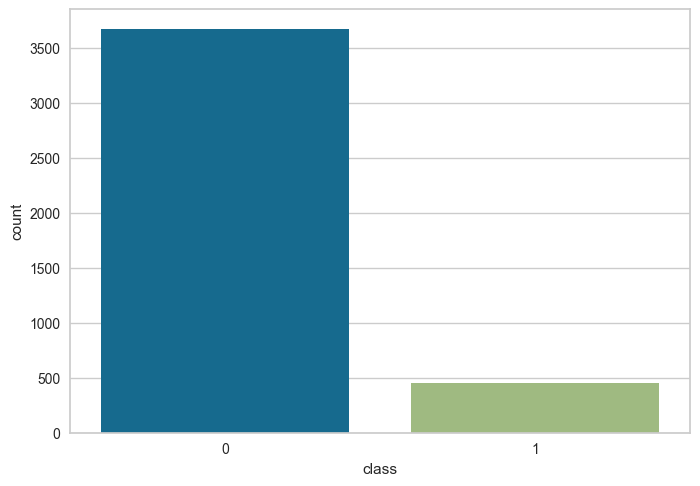

In [31]:
# plot of original data
sns.countplot(x = df_encoded['class'])

### Separamos el dataframe en set de entrenamiento y set de prueba 

In [32]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    df_encoded.drop(labels=['class'], axis=1),  # drop the target
    df_encoded['class'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2883, 11), (1236, 11))

### Balanceamos el set de entrenamiento y set de prueba 

In [33]:
# set up the random undersampling class
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only from majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [34]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((658, 11), (658,))

<Axes: xlabel='class', ylabel='count'>

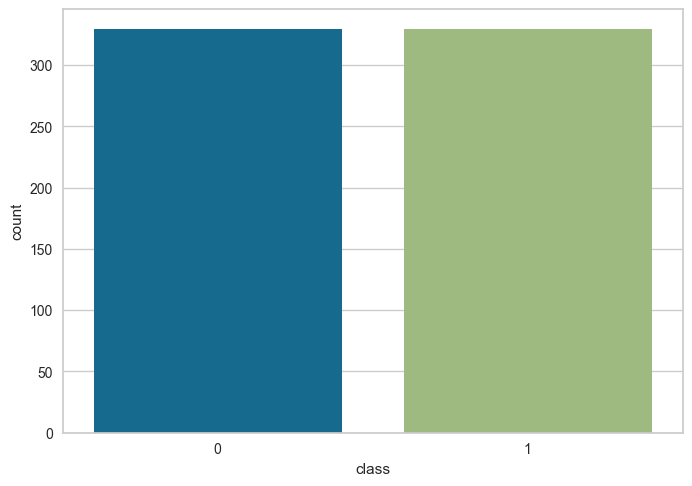

In [35]:
# plot of original data
sns.countplot(x = y_resampled)

# **Modelamiento de los datos (Machine Learning)**

- ### Logistic Regression

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg_params = {
    "penalty": ['l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

gcv_logreg = GridSearchCV(LogisticRegression(solver='lbfgs', random_state=1),
                          param_grid=logreg_params,
                          cv=10,
                          scoring='f1')

logreg_gcv = gcv_logreg.fit(X_resampled, y_resampled)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

logreg_pred = logreg_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, logreg_pred))
print('Accuracy Score: ',accuracy_score(y_test,logreg_pred))
print(f'F1 Score: {f1_score(y_test,logreg_pred)}')

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1114
           1       0.36      0.80      0.50       122

    accuracy                           0.84      1236
   macro avg       0.67      0.82      0.70      1236
weighted avg       0.91      0.84      0.86      1236

Accuracy Score:  0.8406148867313916
F1 Score: 0.4961636828644501


- ### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

nb_params = {"var_smoothing": np.logspace(0, -9, num = 100)}

gcv_nb = GridSearchCV(GaussianNB(), 
                   param_grid = nb_params, 
                   cv = 10, 
                   scoring = 'f1')


nb_gcv = gcv_nb.fit(X_resampled, y_resampled)

In [39]:
nb_pred = nb_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, nb_pred))
print('Accuracy Score: ',accuracy_score(y_test,nb_pred))
print(f'F1 Score: {f1_score(y_test,nb_pred)}\n')

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1114
           1       0.38      0.63      0.47       122

    accuracy                           0.86      1236
   macro avg       0.67      0.76      0.70      1236
weighted avg       0.90      0.86      0.88      1236

Accuracy Score:  0.86084142394822
F1 Score: 0.47239263803680975



- ### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {"criterion": ['gini', 'entropy'],
            "max_depth": np.arange(3, 15)}

gcv_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                   param_grid = dt_params, 
                   cv = 10, 
                   scoring = 'f1')


dt_gcv = gcv_dt.fit(X_resampled, y_resampled)

In [41]:
dt_pred = dt_gcv.best_estimator_.predict(X_test)
print(classification_report(y_test, dt_pred))
print('Accuracy Score: ',accuracy_score(y_test,dt_pred))
print(f'F1 Score: {f1_score(y_test,dt_pred)}\n')

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1114
           1       0.31      0.80      0.44       122

    accuracy                           0.80      1236
   macro avg       0.64      0.80      0.66      1236
weighted avg       0.91      0.80      0.84      1236

Accuracy Score:  0.8042071197411004
F1 Score: 0.44495412844036697



- ### Matriz de Confusión

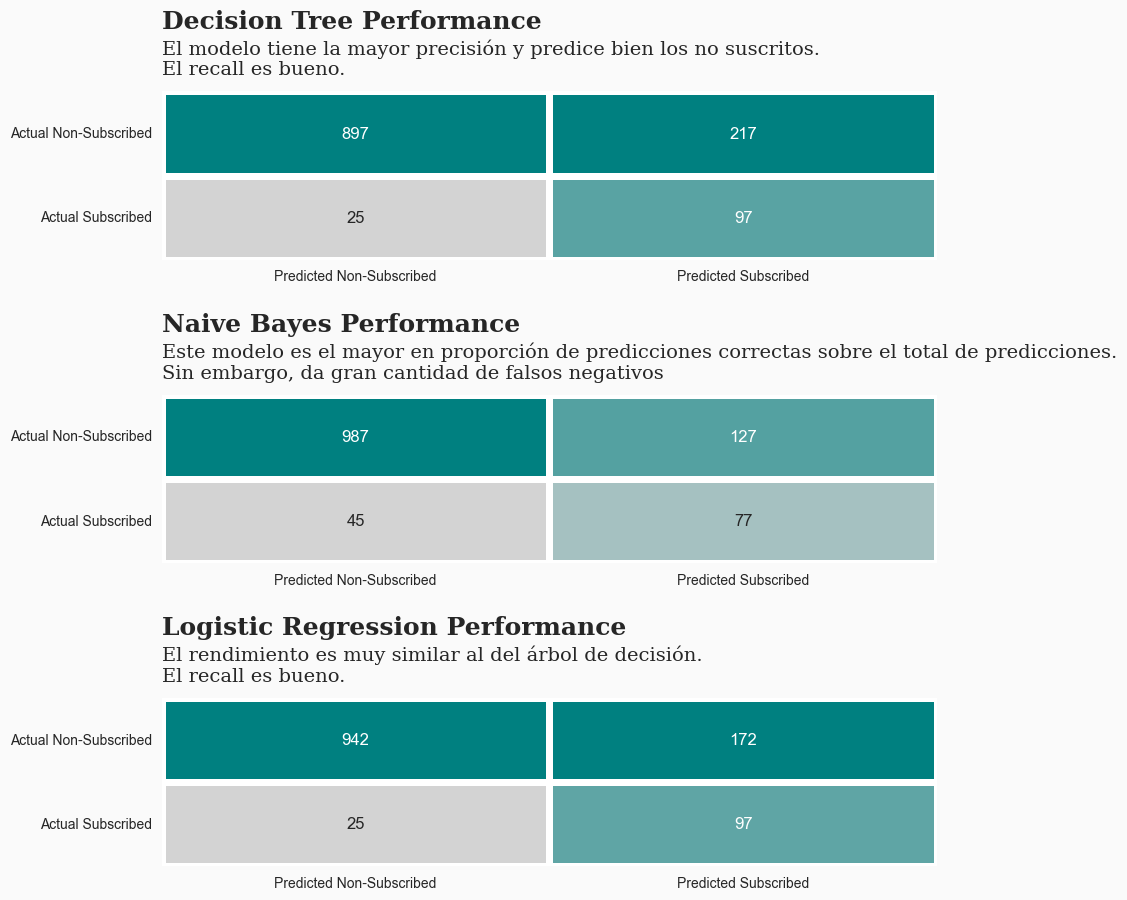

In [43]:
import matplotlib

colors = ['lightgray', Colors.Teal, Colors.Teal, Colors.Teal, Colors.Teal, Colors.Teal, Colors.Teal, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10, 14), facecolor=Colors.LightGray)  # create figure
gs = fig.add_gridspec(4, 2, wspace=0.1, hspace=0.8)

for ax in range(3):
    locals()['ax' + str(ax)] = fig.add_subplot(gs[ax, :])
    locals()['ax' + str(ax)].set_facecolor(Colors.LightGray)
    locals()['ax' + str(ax)].tick_params(axis=u'both', which=u'both', length=0)

# decision tree
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax0,
            yticklabels=['Actual Non-Subscribed', 'Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed', 'Predicted Subscribed'], annot_kws={"fontsize": 12})

# naive bayes
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax1,
            yticklabels=['Actual Non-Subscribed', 'Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed', 'Predicted Subscribed'], annot_kws={"fontsize": 12})

# logistic regression
logreg_cm = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax2,
            yticklabels=['Actual Non-Subscribed', 'Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed', 'Predicted Subscribed'], annot_kws={"fontsize": 12})

# test
ax0.text(0, -0.75, 'Decision Tree Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.2, 'El modelo tiene la mayor precisión y predice bien los no suscritos. \nEl recall es bueno.',
         fontsize=14, fontfamily='serif')

ax1.text(0, -0.75, 'Naive Bayes Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax1.text(0, -0.2, 'Este modelo es el mayor en proporción de predicciones correctas sobre el total de predicciones.\nSin embargo, da gran cantidad de falsos negativos ',
         fontsize=14, fontfamily='serif')

ax2.text(0, -0.75, 'Logistic Regression Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.2, 'El rendimiento es muy similar al del árbol de decisión. \nEl recall es bueno.',
         fontsize=14, fontfamily='serif')

plt.show()

- ### Comparación de modelos

In [44]:
# Make dataframes to plot
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    
    accuracy = (tp+tn) / (tn + tp + fn + fp)
    sensitivity = tp / (fn + tp) 
    precision = tp / (tp + fp) 
    f1 = (2 * (1/((1/precision) + (1/sensitivity))))
    
    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision], 
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])
    
    return foo


logreg_df = dataframe_to_plot('Tuned Logistic Regression Score', logreg_cm)
navbayes_df = dataframe_to_plot('Tuned Naive Bayes Score', nb_cm)
dectree_df = dataframe_to_plot('Tuned Decision Tree Score', dt_cm)

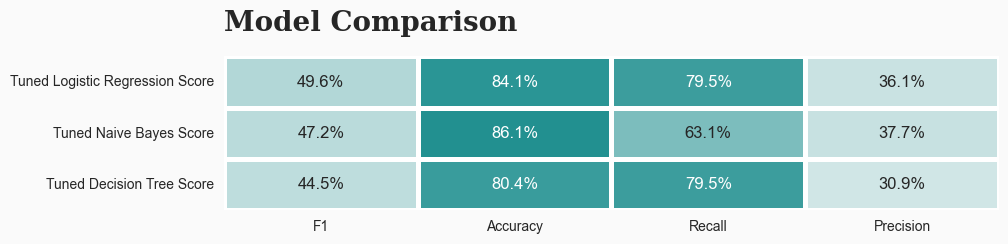

In [45]:
df_models = round(pd.concat([logreg_df, navbayes_df, dectree_df], axis=1),3)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')

plt.show()

# **Conclusiones**

- ### Regresión Logística:

- La precisión para la clase 0 es alta (97%), lo que indica que es bueno para predecir correctamente instancias negativas.
- El recall para la clase 1 es alto (80%), lo que significa que puede identificar la mayoría de las instancias positivas.
- El puntaje F1 para la clase 1 es bajo (50%), lo que indica que hay un desequilibrio entre la precisión y el recall para la clase 1.
- En general, el modelo tiene una precisión y puntaje F1 razonables, pero el recall para la clase 0 es bajo (85%).

- ### Naive Bayes:

- La precisión para la clase 0 es alta (96%), lo que indica una buena capacidad para predecir instancias negativas correctamente.
- El recall para la clase 1 es moderado (63%), lo que indica que puede identificar la mayoría de las instancias positivas.
- El puntaje F1 para la clase 1 es bajo (47%), similar al modelo de Regresión Logística.
- En general, el modelo tiene una precisión razonable, pero el puntaje F1 y el recall para la clase 1 son bajos.

- ### Árbol de decisión:

- La precisión para la clase 0 es alta (97%), lo que indica una buena capacidad para predecir instancias negativas correctamente, similar a los modelos anteriores.
- El recall para la clase 1 es alto (80%), lo que significa que puede identificar la mayoría de las instancias positivas, similar al - modelo de Regresión Logística.
- El puntaje F1 para la clase 1 es bajo (44%), el más bajo de los tres modelos.
- En general, el modelo tiene una precisión y recall razonables, pero el puntaje F1 para la clase 1 es el más bajo.

- ### Conclusión final:

Basado en las métricas y considerando el equilibrio entre precisión, recall y puntaje F1, el modelo de Regresión Logística muestra un rendimiento general mejor en comparación con los otros dos modelos.